In [802]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [803]:
train = pd.read_csv('/content/train_LZdllcl.csv')
test = pd.read_csv('/content/test_2umaH9m.csv')

In [804]:
test.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [805]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [806]:
train.shape

(54808, 14)

In [807]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [808]:
train.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [809]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [810]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [811]:
train.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [812]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [813]:
#handling missing values
train.fillna({'education':train['education'].mode()[0]},inplace =True)
train.fillna({'previous_year_rating':train['previous_year_rating'].mode()[0]},inplace =True)

In [814]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [815]:
train.duplicated().sum()

0

In [816]:
train= train.drop('employee_id',axis=1)

In [817]:
train.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [818]:
num_col = train.select_dtypes(include=['int64','float64']).columns
num_col

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [819]:
num_col = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']

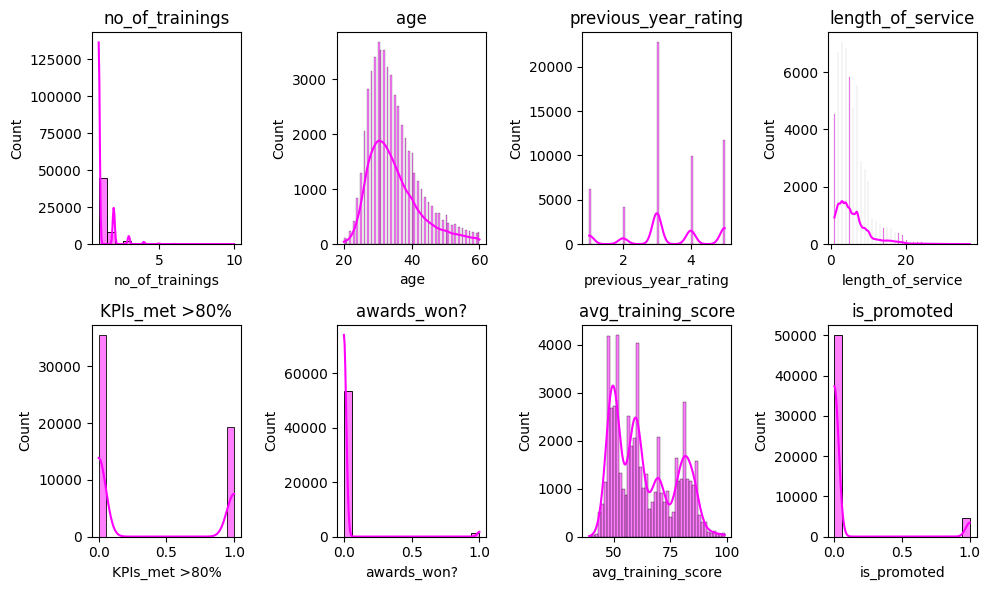

In [820]:
fig,axes = plt.subplots(2,4,figsize=(10,6))
for i, column in enumerate(num_col):
  row,col =divmod(i,4)
  sns.histplot(data =train , x= column ,kde =True, ax = axes[row][col],color ='magenta')
  axes[row][col].set_title(column)

plt.tight_layout()
plt.show()


In [821]:
cat_col = train.select_dtypes(include=['object']).columns
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

<Axes: xlabel='no_of_trainings', ylabel='age'>

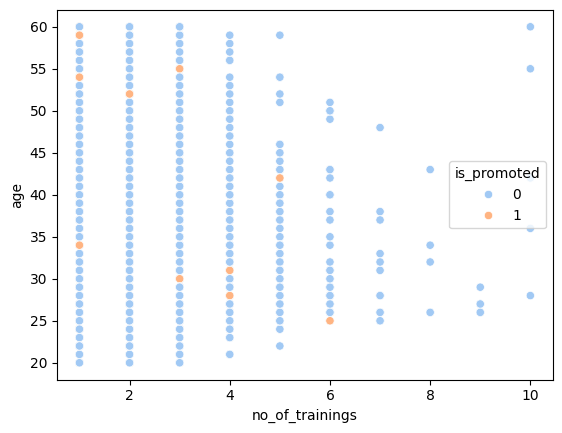

In [822]:

sns.scatterplot(data = train,x='no_of_trainings',y='age',hue ='is_promoted',palette = 'pastel')

<Axes: >

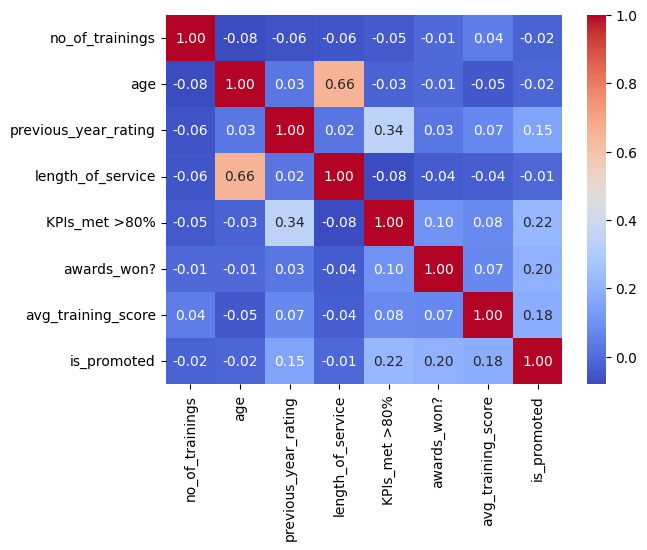

In [823]:
corr_matrix = train[num_col].corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')

In [824]:
train.head(15)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [825]:
gender_enc =pd.get_dummies(train['gender'],prefix ='gen',dtype = 'int')
# congatinate back to data
train = pd.concat([train,gender_enc],axis =1)
train.head()


#drop original
train.drop('gender',axis =1,inplace =True)
train.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gen_f,gen_m
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,0,1,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,0,0,1
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,0,0,1
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,0,0,1
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,0,0,1


In [826]:
dep_enc =pd.get_dummies(train['department'],prefix ='dep',dtype = 'int')
# congatinate back to data
train = pd.concat([train,dep_enc],axis =1)
train.head()


#drop original
train.drop('department',axis =1,inplace =True)
train.head()

,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,0,0,1,0
1,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,...,1,0,0,0,0,1,0,0,0,0
2,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,...,1,0,0,0,0,0,0,0,1,0
3,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,...,1,0,0,0,0,0,0,0,1,0
4,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,...,1,0,0,0,0,0,0,0,0,1


In [827]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
train['education'] =le.fit_transform(train['education'])
train.head()

,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,region_7,2,sourcing,1,35,5.0,8,1,0,49,...,0,0,0,0,0,0,0,0,1,0
1,region_22,0,other,1,30,5.0,4,0,0,60,...,1,0,0,0,0,1,0,0,0,0
2,region_19,0,sourcing,1,34,3.0,7,0,0,50,...,1,0,0,0,0,0,0,0,1,0
3,region_23,0,other,2,39,1.0,10,0,0,50,...,1,0,0,0,0,0,0,0,1,0
4,region_26,0,other,1,45,3.0,2,0,0,73,...,1,0,0,0,0,0,0,0,0,1


In [828]:
train = train.drop('region',axis =1)
train.drop('recruitment_channel',axis =1,inplace =True)
train.head()


,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gen_f,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,2,1,35,5.0,8,1,0,49,0,1,0,0,0,0,0,0,0,0,1,0
1,0,1,30,5.0,4,0,0,60,0,0,1,0,0,0,0,1,0,0,0,0
2,0,1,34,3.0,7,0,0,50,0,0,1,0,0,0,0,0,0,0,1,0
3,0,2,39,1.0,10,0,0,50,0,0,1,0,0,0,0,0,0,0,1,0
4,0,1,45,3.0,2,0,0,73,0,0,1,0,0,0,0,0,0,0,0,1


# scaling

In [829]:
from sklearn.preprocessing import StandardScaler
scalar =StandardScaler()

In [830]:
train.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'gen_f', 'gen_m', 'dep_Analytics',
       'dep_Finance', 'dep_HR', 'dep_Legal', 'dep_Operations',
       'dep_Procurement', 'dep_R&D', 'dep_Sales & Marketing',
       'dep_Technology'],
      dtype='object')

In [831]:
cols =['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'gen_f', 'gen_m', 'dep_Analytics',
       'dep_Finance', 'dep_HR', 'dep_Legal', 'dep_Operations',
       'dep_Procurement', 'dep_R&D', 'dep_Sales & Marketing',
       'dep_Technology']
train[cols] =scalar.fit_transform(train[cols])
train.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gen_f,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,1.619758,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,0,1.536223,-1.536223,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
1,-0.628838,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0,-0.650947,0.650947,-0.328964,-0.220262,-0.214834,-0.139009,1.956975,-0.38696,-0.136256,-0.665982,-0.386960
2,-0.628838,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0,-0.650947,0.650947,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
3,-0.628838,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0,-0.650947,0.650947,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,1.501543,-0.386960
4,-0.628838,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0,-0.650947,0.650947,-0.328964,-0.220262,-0.214834,-0.139009,-0.510993,-0.38696,-0.136256,-0.665982,2.584249


# Test dataset

In [832]:
test.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [833]:
test.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0             8724         Technology  region_26        Bachelor's      m   
1            74430                 HR   region_4        Bachelor's      f   
2            72255  Sales & Marketing  region_13        Bachelor's      m   
3            38562        Procurement   region_2        Bachelor's      f   
4            64486            Finance  region_29        Bachelor's      m   
...            ...                ...        ...               ...    ...   
23485        53478              Legal   region_2   Below Secondary      m   
23486        25600         Technology  region_25        Bachelor's      m   
23487        45409                 HR  region_16        Bachelor's      f   
23488         1186        Procurement  region_31        Bachelor's      m   
23489         5973         Technology  region_17  Master's & above      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   NaN   
1                   other                1   31                   3.0   
2                   other                1   31                   1.0   
3                   other                3   31                   2.0   
4                sourcing                1   30                   4.0   
...                   ...              ...  ...                   ...   
23485            sourcing                1   24                   3.0   
23486            sourcing                1   31                   3.0   
23487            sourcing                1   26                   4.0   
23488            sourcing                3   27                   NaN   
23489               other                3   40                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                      1              1            0                  77  
1                      5              0            0                  51  
2                      4              0            0                  47  
3                      9              0            0                  65  
4                      7              0            0                  61  
...                  ...            ...          ...                 ...  
23485                  1              0            0                  61  
23486                  7              0            0                  74  
23487                  4              0            0                  50  
23488                  1              0            0                  70  
23489                  5              1            0                  89  

[23490 rows x 13 columns]>

In [834]:
test.shape

(23490, 13)

In [835]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [836]:
test.dtypes

,0
employee_id,int64
department,object
region,object
education,object
gender,object
recruitment_channel,object
no_of_trainings,int64
age,int64
previous_year_rating,float64
length_of_service,int64


In [837]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [838]:
test.describe(include='object')

,department,region,education,gender,recruitment_channel
count,23490,23490,22456,23490,23490
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,7315,5299,15578,16596,13078


In [839]:
test.nunique()

,0
employee_id,23490
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,9
age,41
previous_year_rating,5
length_of_service,34


In [840]:
test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [841]:
test.fillna({'education':test['education'].mode()[0]},inplace =True)
test.fillna({'previous_year_rating':test['previous_year_rating'].mode()[0]},inplace =True)

In [842]:
test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


In [843]:
test.duplicated().sum()

0

In [844]:
test= test.drop('employee_id',axis=1)

In [845]:
num_coltest = test.select_dtypes(include=['int64','float64']).columns
num_coltest

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [846]:
cat_coltest = test.select_dtypes(include=['object']).columns
cat_coltest

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [847]:
test = test.drop('region',axis =1)
test.drop('recruitment_channel',axis =1,inplace =True)
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,1,24,3.0,1,1,0,77
1,HR,Bachelor's,f,1,31,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,1,31,1.0,4,0,0,47
3,Procurement,Bachelor's,f,3,31,2.0,9,0,0,65
4,Finance,Bachelor's,m,1,30,4.0,7,0,0,61


In [848]:
gender_enc =pd.get_dummies(test['gender'],prefix ='gen',dtype = 'int')
# congatinate back to data
test = pd.concat([test,gender_enc],axis =1)
test.head()


#drop original
test.drop('gender',axis =1,inplace =True)
test.head()

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gen_f,gen_m
0,Technology,Bachelor's,1,24,3.0,1,1,0,77,0,1
1,HR,Bachelor's,1,31,3.0,5,0,0,51,1,0
2,Sales & Marketing,Bachelor's,1,31,1.0,4,0,0,47,0,1
3,Procurement,Bachelor's,3,31,2.0,9,0,0,65,1,0
4,Finance,Bachelor's,1,30,4.0,7,0,0,61,0,1


In [849]:
dep_enc =pd.get_dummies(test['department'],prefix ='dep',dtype = 'int')
# congatinate back to data
test = pd.concat([test,dep_enc],axis =1)
test.head()


#drop original
test.drop('department',axis =1,inplace =True)
test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gen_f,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,Bachelor's,1,24,3.0,1,1,0,77,0,1,0,0,0,0,0,0,0,0,1
1,Bachelor's,1,31,3.0,5,0,0,51,1,0,0,0,1,0,0,0,0,0,0
2,Bachelor's,1,31,1.0,4,0,0,47,0,1,0,0,0,0,0,0,0,1,0
3,Bachelor's,3,31,2.0,9,0,0,65,1,0,0,0,0,0,0,1,0,0,0
4,Bachelor's,1,30,4.0,7,0,0,61,0,1,0,1,0,0,0,0,0,0,0


In [850]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
test['education'] =le.fit_transform(test['education'])
test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gen_f,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,0,1,24,3.0,1,1,0,77,0,1,0,0,0,0,0,0,0,0,1
1,0,1,31,3.0,5,0,0,51,1,0,0,0,1,0,0,0,0,0,0
2,0,1,31,1.0,4,0,0,47,0,1,0,0,0,0,0,0,0,1,0
3,0,3,31,2.0,9,0,0,65,1,0,0,0,0,0,0,1,0,0,0
4,0,1,30,4.0,7,0,0,61,0,1,0,1,0,0,0,0,0,0,0


In [851]:
test.columns

Index(['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'gen_f', 'gen_m', 'dep_Analytics', 'dep_Finance',
       'dep_HR', 'dep_Legal', 'dep_Operations', 'dep_Procurement', 'dep_R&D',
       'dep_Sales & Marketing', 'dep_Technology'],
      dtype='object')

In [852]:
colstest =['education', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score',  'gen_f', 'gen_m', 'dep_Analytics',
       'dep_Finance', 'dep_HR', 'dep_Legal', 'dep_Operations',
       'dep_Procurement', 'dep_R&D', 'dep_Sales & Marketing',
       'dep_Technology']
test[colstest] =scalar.fit_transform(test[colstest])
test.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gen_f,gen_m,dep_Analytics,dep_Finance,dep_HR,dep_Legal,dep_Operations,dep_Procurement,dep_R&D,dep_Sales & Marketing,dep_Technology
0,-0.637366,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263,-0.644516,0.644516,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,2.607948
1,-0.637366,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377,1.551551,-1.551551,-0.330963,-0.220698,4.544202,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443
2,-0.637366,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629,-0.644516,0.644516,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,1.487014,-0.383443
3,-0.637366,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506,1.551551,-1.551551,-0.330963,-0.220698,-0.220061,-0.138961,-0.504386,2.603487,-0.138163,-0.672489,-0.383443
4,-0.637366,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746,-0.644516,0.644516,-0.330963,4.531082,-0.220061,-0.138961,-0.504386,-0.384100,-0.138163,-0.672489,-0.383443


In [853]:
train.shape

(54808, 20)

In [854]:
test.shape

(23490, 19)

In [855]:


# Define features and target variable
X_train = train.drop(columns=['is_promoted'])
y_train = train['is_promoted']

X_test = test.copy()

In [856]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


In [857]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [864]:
y_train_pred = logit_model.predict(X_train)

In [865]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_train_pred)
print("F1 Score:", f1)

F1 Score: 0.401104254628126


In [867]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)
s_pred = svm_model.predict(X_test)

# Predict on the training data to get predictions for the same samples as y_train
s_pred_train = svm_model.predict(X_train)

# Calculate accuracy using the training data predictions and labels
acc = accuracy_score(y_train, s_pred_train)
print(acc)

0.9261056780032112


In [868]:
f1 = f1_score(y_train, s_pred_train)
print(f1)

0.23382519863791146


In [870]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)
d_pred=dt_model.predict(X_test)
d_pred_train = dt_model.predict(X_train)

f1=f1_score(y_train,d_pred_train)
f1

0.9545353242701137

In [871]:
d_pred

array([0, 0, 0, ..., 0, 0, 1])

In [879]:
sample = pd.read_csv('/content/sample_submission_M0L0uXE.csv')

In [880]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [882]:
sample['is_promoted'] = d_pred

In [886]:
sample.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [887]:
sample.to_csv('sample.csv', index=False)  # Save without index

In [888]:
!ls

sample.csv  sample_data  sample_submission_M0L0uXE.csv	test_2umaH9m.csv  train_LZdllcl.csv


In [889]:
sample.to_csv(r'/content/sample.csv', index=False)

In [890]:
from google.colab import files
files.download('sample.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [892]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
r_pred=rf_model.predict(X_test)
r_pred_train = rf_model.predict(X_train)

f1=f1_score(y_train,r_pred_train)
f1


0.9548315847598012

In [893]:
r_pred

array([0, 0, 0, ..., 0, 0, 1])

In [894]:
sample_df=pd.read_csv(r"/content/sample_submission_M0L0uXE.csv")

In [895]:
sample_df["is_promoted"]=r_pred

In [896]:
sample_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [897]:
sample_df.to_csv('sample_df.csv', index=False)  # Save without index

In [898]:
from google.colab import files
files.download('sample_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>